<a href="https://colab.research.google.com/github/atarasaki/DSWP-editados/blob/main/Notebooks/2020-11-19-NB15_04__ML_SL_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM - Support Vector Machines

<hr>

### Agenda
1. Introdução ao SVM - Support Vector Machines
2. Maximal Margin Classifier
3. Soft Margin Classifier
2. SVM Algorithm for Classification
3. SVM 
4. SVM for Regression
5. Hyper-parameters in SVM

<hr>

### 1. Introdução ao SVM - Support Vector Machines
* Método Supervisionado usado para Classificação, Regressão e detecção de outlier;
* SVM são eficientes em dataframes grandes;
* Usa um subconjunto do dataframe de treinamento - uso eficiente de memória;
* É também eficiente nos casos em que o número de colunas é maior que o número de linhas.

### 2. Maximal Margin Classifier
* Objetivo: encontrar uma linha (ou hiper-plano) que maximiza a separação entre diferentes classes do dataframe;

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkOQ1Q4Xr1J-J8qbwOZxbV9HmwOs2o2iHo2dLRxVxjq1R0MibU0A">

### 3. Soft Margin Classifier
* No mundo real, torna-se muito difícil de separar os dados por hiperplanos;
* Com Soft Margin Classifier, alguns (poucos) dados são permitidos serem classificados incorretamente.

<img src="https://www.researchgate.net/profile/Catarina_Moreira2/publication/260283043/figure/fig12/AS:297261608259590@1447884098130/Figure-A14-Soft-margin-linear-SVM-classifier.png" width="300px">


In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
X, y = make_circles(n_samples = 1000, noise = .05, factor = .5)

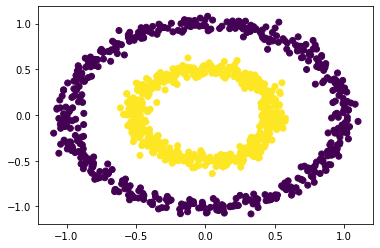

In [3]:
plt.scatter(X[:, 0],X[:, 1], c = y)

### Fazendo a transformação manualmente

In [4]:
col = np.sum(np.square(X),axis=1)

In [5]:
Z = np.hstack([X,col.reshape(-1,1)])

In [6]:
from mpl_toolkits.mplot3d import Axes3D

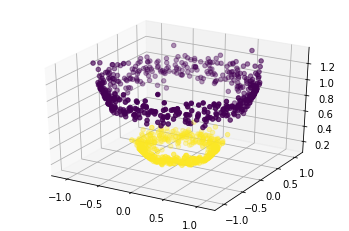

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs=Z[:,0],ys=Z[:,1],zs=Z[:,2],c=y)

* Agora conseguimos ver claramente um possível plano separando os pontos.

## Entendendo os Kernels
* Kernels são parte integrante do SVM, responsável por transformar dados não linearmente separáveis em dimensões mais altas, de modo que sejam linearmente separáveis;
* Diferentes tipos de kernels são suportados pelo SVM;
* Todo kernel tem uma maneira diferente de transformar dados em uma dimensão superior
Linear, Polinomial, RBF, Sigmoid e seu próprio kernel personalizado.

#### Kernels Lineares
* Sempre adote uma abordagem simples a complexa.
* Se a separação linear é possível entre as classes, os núcleos lineares funcionariam.

In [8]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
iris_data = load_iris()

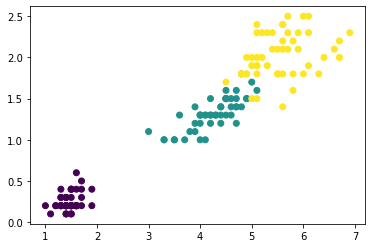

In [10]:
plt.scatter(iris_data.data[:, 2], iris_data.data[:, 3],c = iris_data.target)

In [11]:
from sklearn.svm import SVC

In [12]:
svc = SVC(kernel='linear')

In [13]:
svc.fit(iris_data.data[:,[2,3]], iris_data.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
X = iris_data.data[:, [2, 3]]

In [15]:
y = iris_data.target

In [16]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [17]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

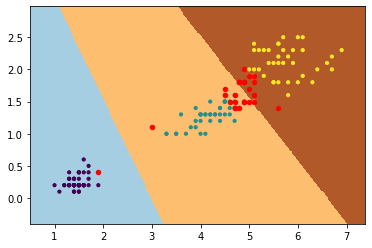

In [18]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

* Podemos ver claramente os separadores lineares

In [19]:
svc.support_vectors_

array([[1.9, 0.4],
       [4.7, 1.4],
       [4.9, 1.5],
       [4.6, 1.5],
       [4.7, 1.6],
       [4.7, 1.4],
       [4.8, 1.8],
       [4.9, 1.5],
       [4.8, 1.4],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.6],
       [4.7, 1.5],
       [3. , 1.1],
       [4.5, 1.7],
       [5. , 1.5],
       [4.9, 2. ],
       [4.9, 1.8],
       [4.8, 1.8],
       [4.9, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8],
       [5.1, 1.9],
       [5. , 1.9],
       [5.1, 1.8]])

### Kernels Polinomiais
* Transforma dados para ordens polinomiais.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/svm24.PNG?raw=true" width="300px">

In [20]:
from sklearn.datasets import make_moons

In [21]:
X, Y = make_moons(n_samples = 1000, noise = .05)

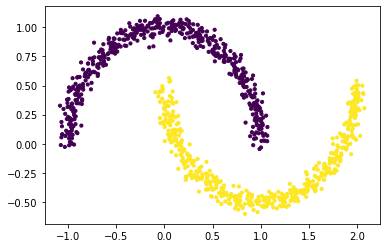

In [22]:
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [23]:
svc = SVC(kernel = 'poly')

In [24]:
svc.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [26]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

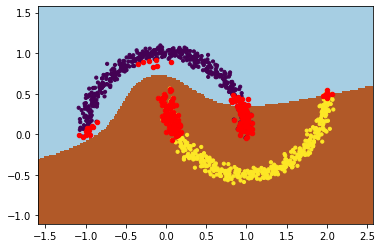

In [27]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

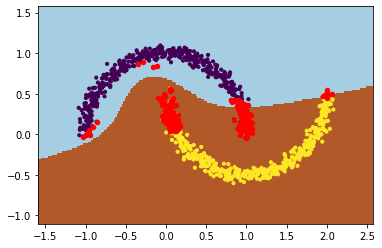

In [28]:
svc = SVC(kernel='poly', C=10)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

### Kernel RBF (Radial Basis Function)
* RBF é um truque do kernel para transformar dados não linearmente e prever o separador;

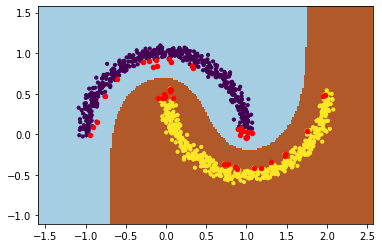

In [29]:
svc = SVC(kernel = 'rbf')
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

### Entendendo o parâmetro C
* O parâmetro C se comporta como um parâmetro de regularização no SVM.
* Para valores maiores de C, uma margem menor será aceita se a função de decisão for melhor em classificar todos os pontos de treinamento corretamente.
* Um C mais baixo encorajará uma margem maior, portanto, uma função de decisão mais simples, à custa da precisão do treinamento.

In [30]:
X, Y = make_moons(n_samples = 100, noise = .3)

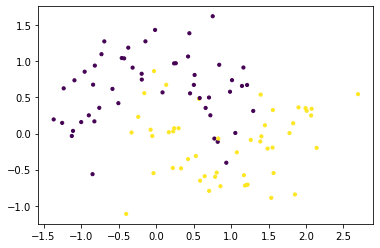

In [31]:
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [32]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

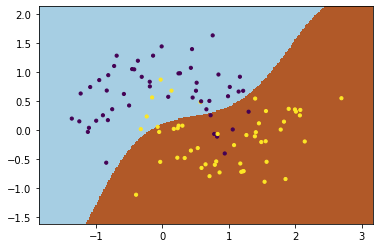

In [33]:
svc = SVC(kernel='rbf', C=0.1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

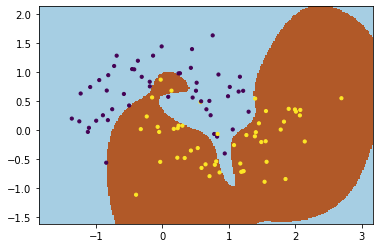

In [34]:
svc = SVC(kernel = 'rbf', C = 100000)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

#### Entendendo o parâmetro Gamma
* Gamma é um parâmetro para lidar com a classificação não linear;
* Ao aumentar o valor do gama, estamos aumentando a importância de cada ponto.

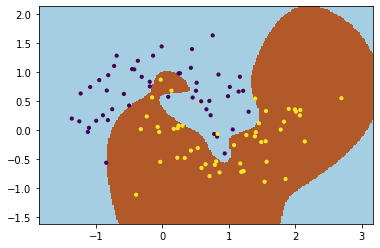

In [35]:
svc = SVC(kernel='rbf', C=100000, gamma=1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

* Usando Grid-Search, podemos encontrar o valor correto para kernel, C & gamma.

### SVM for Regression
* A variável target tem que ser contínua por natureza;
* A relação entre as preditoras podem ser lineares ou não-lineares;
* Kernels: linear, poly ou rbf

In [36]:
X = np.sort(5 * np.random.rand(40, 1), axis = 0)
y = np.sin(X).ravel()

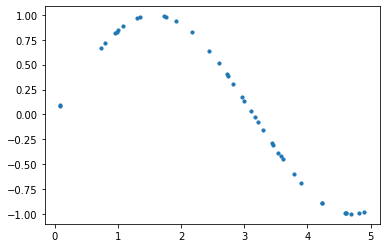

In [37]:
plt.scatter(X, y,s=10)

In [38]:
from sklearn.svm import SVR

In [39]:
svrs = [SVR(kernel='linear'), SVR(kernel='poly'), SVR(kernel='rbf')]

In [40]:
for model in svrs:
    model.fit(X,y)

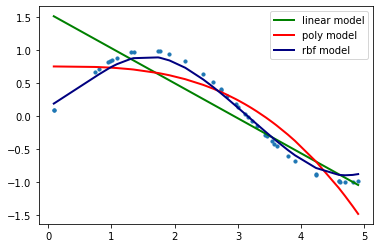

In [41]:
lw = 2
plt.scatter(X, y,s=10)
plt.plot(X, svrs[0].predict(X), color='green', lw=lw, label='linear model')
plt.plot(X, svrs[1].predict(X), color='red', lw=lw, label='poly model')
plt.plot(X, svrs[2].predict(X), color='navy', lw=lw, label='rbf model')
plt.legend()

### Understanding Custom Kernel
* Além de kernels embutidos para transformar dados, podemos escrever nossos próprios kernels personalizados.

In [42]:
def meu_kernel(X, Y):
    return np.dot(X, Y.T)

In [43]:
X, y = make_circles(n_samples = 1000, noise = .05, factor = .5)

In [44]:
svc = SVC(kernel = meu_kernel)

In [45]:
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function meu_kernel at 0x7f60e5722ae8>, max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
X.shape[0]

1000

In [47]:
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def meu_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    res = np.dot(np.dot(X, M), Y.T)
    print (res.shape)
    return res


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = SVC(kernel=meu_kernel)
clf.fit(X, Y)

(150, 150)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function meu_kernel at 0x7f60e56da620>, max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)